In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt


### 1.1

In [43]:
NETWORK_DIM = 300
N_PATTERNS = 5
T = 5
patterns = utils.get_n_binary_patterns(n_patterns=N_PATTERNS, pattern_dim=NETWORK_DIM, check_overlaps=True)
cs = patterns[0]#np.random.binomial(1, 0.5, NETWORK_DIM) * 2 - 1
overlaps = []
for t in range(T):
    overlaps_t = [utils.overlap(cs, p) for p in patterns]
    overlaps.append(overlaps_t)
    ns = utils.compute_next_state_with_overlaps(cs, patterns)
    cs = ns
overlaps = np.array(overlaps).T
plt.figure()
for i, overlap in enumerate(overlaps):
    plt.plot(overlap, label=f'Overlap with pattern {i}')

plt.xlabel('Time')
plt.ylabel('Overlap')
plt.title('Overlap of state with each pattern over time')
plt.legend()
plt.show()

The overlap remains constant because overlap between patterns is 0 and initial state is pattern 0 hence in the overlap updatte step, next state is equal to current state

### 1.2

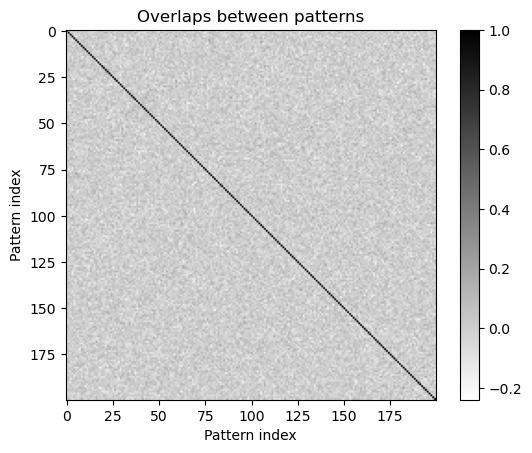

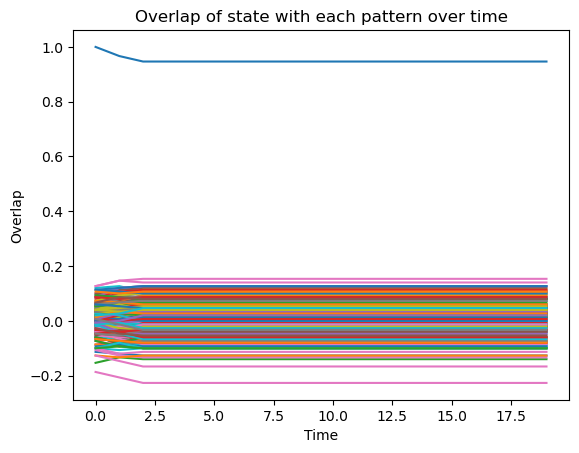

In [58]:
NETWORK_DIM = 300
N_PATTERNS = 200
T = 20
patterns = utils.get_n_binary_patterns(n_patterns=N_PATTERNS, pattern_dim=NETWORK_DIM, check_overlaps=True)
cs = patterns[0]#np.random.binomial(1, 0.5, NETWORK_DIM) * 2 - 1
overlaps = []
for t in range(T):
    overlaps_t = [utils.overlap(cs, p) for p in patterns]
    overlaps.append(overlaps_t)
    ns = utils.compute_next_state_with_overlaps(cs, patterns)
    cs = ns
overlaps = np.array(overlaps).T
plt.figure()
for i, overlap in enumerate(overlaps):
    plt.plot(overlap, label=f'Overlap with pattern {i}')

plt.xlabel('Time')
plt.ylabel('Overlap')
plt.title('Overlap of state with each pattern over time')
# plt.legend()
plt.show()

seem to converge close to pattern 0 (wierd)

### 1.3

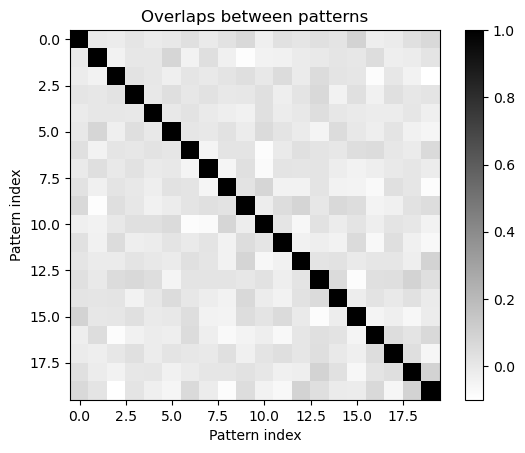

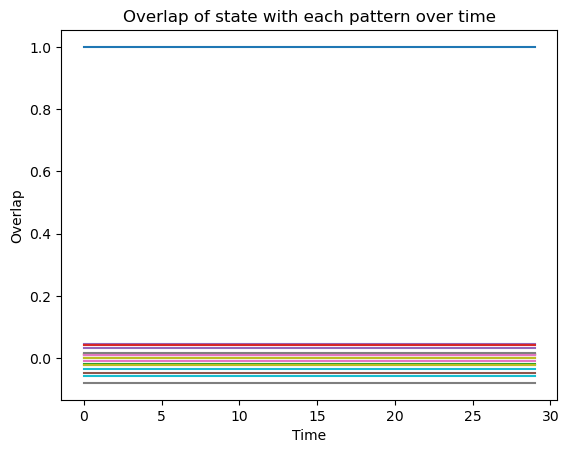

In [60]:
NETWORK_DIM = 600
N_PATTERNS = 20
T = 30
N_FLIP = 400

patterns = utils.get_n_binary_patterns(n_patterns=N_PATTERNS, pattern_dim=NETWORK_DIM, check_overlaps=True)
cs = patterns[0]#np.random.binomial(1, 0.5, NETWORK_DIM) * 2 - 1

#flip N_FLIP bits of cs
indices = np.random.choice(NETWORK_DIM, N_FLIP, replace=False)
for i in indices:
    cs[i] = -cs[i]


overlaps = []
for t in range(T):
    overlaps_t = [utils.overlap(cs, p) for p in patterns]
    overlaps.append(overlaps_t)
    ns = utils.compute_next_state_with_overlaps(cs, patterns)
    cs = ns
overlaps = np.array(overlaps).T
plt.figure()
for i, overlap in enumerate(overlaps):
    plt.plot(overlap, label=f'Overlap with pattern {i}')

plt.xlabel('Time')
plt.ylabel('Overlap')
plt.title('Overlap of state with each pattern over time')
# plt.legend()
plt.show()